In [1]:
from watson_developer_cloud import VisualRecognitionV3

visual_recognition = VisualRecognitionV3(
    version='2018-03-19',
    iam_apikey='GgWZ5amJis-iQt90zCjTAyqeA7ct8AlqOyQUpP0tx_J-'
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: watson-developer-cloud moved to ibm-watson. To get updates, use the new package.
  """


In [2]:
import json
from ibm_watson import VisualRecognitionV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import requests
from io import BytesIO

authenticator = IAMAuthenticator('GgWZ5amJis-iQt90zCjTAyqeA7ct8AlqOyQUpP0tx_J-')
visual_recognition = VisualRecognitionV3(
    version='2018-03-19',
    authenticator=authenticator
)

visual_recognition.set_service_url('https://api.us-south.visual-recognition.watson.cloud.ibm.com/instances/fd0e7272-816f-4c56-9fcb-69f9f866d906')

url = 'https://media-cdn.tripadvisor.com/media/photo-s/1b/4a/e0/6a/rice-to-meet-you.jpg'
classifier_ids = ["food"]

classes_result = visual_recognition.classify(url=url, classifier_ids=classifier_ids).get_result()
print(json.dumps(classes_result, indent=2))


Populating the interactive namespace from numpy and matplotlib
{
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "food",
          "name": "food",
          "classes": [
            {
              "class": "salmon roll",
              "score": 0.651
            },
            {
              "class": "sushi",
              "score": 0.5
            }
          ]
        }
      ],
      "source_url": "https://media-cdn.tripadvisor.com/media/photo-s/1b/4a/e0/6a/rice-to-meet-you.jpg",
      "resolved_url": "https://media-cdn.tripadvisor.com/media/photo-s/1b/4a/e0/6a/rice-to-meet-you.jpg"
    }
  ],
  "images_processed": 1,
  "custom_classes": 0
}


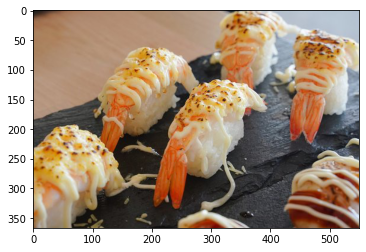

In [3]:
response = requests.get(url)
img = Image.open(BytesIO(response.content))
imgplot = plt.imshow(img)
plt.show()

In [4]:
type(classes_result)

dict

In [5]:
classes_result.keys()

dict_keys(['images', 'images_processed', 'custom_classes'])

In [6]:
classes_result['images']

[{'classifiers': [{'classifier_id': 'food',
    'name': 'food',
    'classes': [{'class': 'salmon roll', 'score': 0.651},
     {'class': 'sushi', 'score': 0.5}]}],
  'source_url': 'https://media-cdn.tripadvisor.com/media/photo-s/1b/4a/e0/6a/rice-to-meet-you.jpg',
  'resolved_url': 'https://media-cdn.tripadvisor.com/media/photo-s/1b/4a/e0/6a/rice-to-meet-you.jpg'}]

In [7]:
print('The Type of Result is : ' + str(type(classes_result['images'])))

The Type of Result is : <class 'list'>


### Loop For The List

In [8]:
for key, value in classes_result.items():
        print(key, ":", value)

images : [{'classifiers': [{'classifier_id': 'food', 'name': 'food', 'classes': [{'class': 'salmon roll', 'score': 0.651}, {'class': 'sushi', 'score': 0.5}]}], 'source_url': 'https://media-cdn.tripadvisor.com/media/photo-s/1b/4a/e0/6a/rice-to-meet-you.jpg', 'resolved_url': 'https://media-cdn.tripadvisor.com/media/photo-s/1b/4a/e0/6a/rice-to-meet-you.jpg'}]
images_processed : 1
custom_classes : 0


In [9]:
classes_result['images']

[{'classifiers': [{'classifier_id': 'food',
    'name': 'food',
    'classes': [{'class': 'salmon roll', 'score': 0.651},
     {'class': 'sushi', 'score': 0.5}]}],
  'source_url': 'https://media-cdn.tripadvisor.com/media/photo-s/1b/4a/e0/6a/rice-to-meet-you.jpg',
  'resolved_url': 'https://media-cdn.tripadvisor.com/media/photo-s/1b/4a/e0/6a/rice-to-meet-you.jpg'}]

In [10]:
for classifiers in classes_result['images']:
    print (type(classifiers))

<class 'dict'>


In [11]:
for classifiers in classes_result['images']:
    print(classifiers)

{'classifiers': [{'classifier_id': 'food', 'name': 'food', 'classes': [{'class': 'salmon roll', 'score': 0.651}, {'class': 'sushi', 'score': 0.5}]}], 'source_url': 'https://media-cdn.tripadvisor.com/media/photo-s/1b/4a/e0/6a/rice-to-meet-you.jpg', 'resolved_url': 'https://media-cdn.tripadvisor.com/media/photo-s/1b/4a/e0/6a/rice-to-meet-you.jpg'}


In [12]:
for classifiers in classes_result['images']:
    print(classifiers.keys())

dict_keys(['classifiers', 'source_url', 'resolved_url'])


In [13]:
for classifiers in classes_result['images']:
    print (classifiers['classifiers'])

[{'classifier_id': 'food', 'name': 'food', 'classes': [{'class': 'salmon roll', 'score': 0.651}, {'class': 'sushi', 'score': 0.5}]}]


In [14]:
for classifiers in classes_result['images']:
    print (type(classifiers['classifiers']))

<class 'list'>


In [15]:
for classifiers in classes_result['images']:
    for id in classifiers['classifiers']:
        print(f'This is The ID : {id} \n')
        print(f'This is The class ID : {id["classifier_id"]}\n')
        print(f'This is The name : {id["name"]}\n')
        print(f'This is The classes : {id["classes"]}\n')
        clasess = id['classes']
        #print(id['classifier_id'])
        for score in id['classes']:
            print (f'This is The Class score : {score}\n')
            #print (score['class'])
            #print (score['score'])

This is The ID : {'classifier_id': 'food', 'name': 'food', 'classes': [{'class': 'salmon roll', 'score': 0.651}, {'class': 'sushi', 'score': 0.5}]} 

This is The class ID : food

This is The name : food

This is The classes : [{'class': 'salmon roll', 'score': 0.651}, {'class': 'sushi', 'score': 0.5}]

This is The Class score : {'class': 'salmon roll', 'score': 0.651}

This is The Class score : {'class': 'sushi', 'score': 0.5}



In [16]:
clasess

[{'class': 'salmon roll', 'score': 0.651}, {'class': 'sushi', 'score': 0.5}]

In [17]:
type(clasess)

list

In [18]:
for cl in clasess:
    print(cl['class'] , cl['score'])

salmon roll 0.651
sushi 0.5


# Make The Function 

In [19]:
def result(classes_result):
    for classifiers in classes_result['images']:
        for id in classifiers['classifiers']:
            print(f'This is The ID : {id} \n')
            print(f'This is The class ID : {id["classifier_id"]}\n')
            print(f'This is The name : {id["name"]}\n')
            print(f'This is The classes : {id["classes"]}\n')
            clasess = id['classes']
            for cl in clasess:
                print(cl['class'] , cl['score'])
                

In [20]:
result(classes_result)

This is The ID : {'classifier_id': 'food', 'name': 'food', 'classes': [{'class': 'salmon roll', 'score': 0.651}, {'class': 'sushi', 'score': 0.5}]} 

This is The class ID : food

This is The name : food

This is The classes : [{'class': 'salmon roll', 'score': 0.651}, {'class': 'sushi', 'score': 0.5}]

salmon roll 0.651
sushi 0.5


# Analyse Img From Gallary

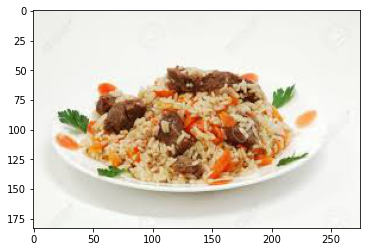

In [21]:
with open('./rice.jpeg', 'rb') as images_file :
    img = mpimg.imread(images_file)
    imgplot = plt.imshow(img)
    plt.show()

In [22]:
visual_recognition.set_service_url('https://api.us-south.visual-recognition.watson.cloud.ibm.com/instances/fd0e7272-816f-4c56-9fcb-69f9f866d906')

with open('./rice.jpeg', 'rb') as images_file :
    classes = visual_recognition.classify(
        images_file=images_file,
        threshold='0.6',
        owners=["me"]).get_result()
    print(json.dumps(classes, indent=2))


{
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "FurnitureWepApp_1883684006",
          "name": "Furniture WepApp",
          "classes": [
            {
              "class": "Tables",
              "score": 0.847
            }
          ]
        }
      ],
      "image": "rice.jpeg"
    }
  ],
  "images_processed": 1,
  "custom_classes": 3
}


In [23]:
result(classes)

This is The ID : {'classifier_id': 'FurnitureWepApp_1883684006', 'name': 'Furniture WepApp', 'classes': [{'class': 'Tables', 'score': 0.847}]} 

This is The class ID : FurnitureWepApp_1883684006

This is The name : Furniture WepApp

This is The classes : [{'class': 'Tables', 'score': 0.847}]

Tables 0.847
